<a href="https://colab.research.google.com/github/Rafael1050/cpa-ex-nota1/blob/main/EFC1_GCC_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Rafael Victor Marciano Arriel

**Matricula**: 201811050

**Turma**: 14A

Link do repositório GitHub: 

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 24 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [4]:
import numpy as np
import time 
import matplotlib.pyplot as plt
import sys
#print(sys.getrecursionlimit())

sys.setrecursionlimit(1000000)
#print(sys.getrecursionlimit())


#global_1=0


# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [5]:
def insertionSort(vetor):
  
  ini = time.time()
  comp = 0
  
  for j in range(1,len(vetor)): 
    chave = vetor[j]
    i = j-1
    
    while i>=0 and vetor[i]>chave:
      vetor[i+1]= vetor[i]
      i=i-1
    vetor[i+1] = chave
  
  fim = time.time()
  
  return fim-ini, comp

##  Merge Sort


In [21]:
def merge(arr, c):    
    if(len(arr) > 1):        
        arrE = arr[:int(len(arr)/2)]
        arrD = arr[int(len(arr)/2):]       
        arrE = merge(arrE, c)
        arrD = merge(arrD, c)
        arr = sort(arrE, arrD, c)        
        return arr
    return arr    


def sort(arrE,arrD, c):   
    arrO = []
    while len(arrE) > 0 and len(arrD) > 0:
        c[0] += 1           
        if arrE[0] < arrD[0]:
            arrO.append(arrE[0])
            arrE = arrE[1:]
        else:
            arrO.append(arrD[0])
            arrD = arrD[1:]    
    while len(arrE) > 0:        
        arrO.append(arrE[0])
        arrE = arrE[1:]
    while len(arrD) > 0:          
        arrO.append(arrD[0])
        arrD = arrD[1:]   
    return arrO


def mergeSort(arr):
    c = [0]    
    
    ini = time.time()
    merge(arr, c)
    fim = time.time()

    return fim - ini, c[0]

##  Selection Sort


In [7]:
def selectionSort(vetor):
  
  ini = time.time()
  comp = 0

  for i in range(len(vetor)):
    min = i
    
    for j in range(i+1, len(vetor)):
      if vetor[min] > vetor[j]:
        min = j
    
        vetor[i], vetor[min] = vetor[min], vetor[i]
  
  fim = time.time()
  
  return fim-ini, comp

##  Bubble Sort


In [8]:
def bubbleSort(vetor):
  
  ini = time.time()
  comp = 0
  
  alterado = True

  for i in range(1,len(vetor)):
    
    if(alterado == True):
      alterado = True
      
      for j in range(0,len(vetor)-i):
      
        if(vetor[j] > vetor[j+1]):
          temp = vetor[j+1] 
          vetor[j+1] = vetor[j] 
          vetor[j] = temp

          alterado = True

  fim = time.time()
    
 
  return fim-ini, comp

## Heap Sort

In [9]:
def heapify(arr, n, i):

  largest = i
  l = 2 * i + 1
  r = 2 * i + 2
  
  if l < n and arr[i] < arr[l]:
    largest = l
  
  if r < n and arr[largest] < arr[r]:
    largest = r
  
  if largest != i:
    arr[i], arr[largest] = arr[largest], arr[i]
    heapify(arr, n, largest)
  

def heapSort(vetor):
  
  ini = time.time()
  comp = 0

  n = len(vetor)
     
  for i in range(n//2, -1, -1):
    heapify(vetor, n, i)
  
  for i in range(n-1, 0, -1):
        
    vetor[i], vetor[0] = vetor[0], vetor[i]
    heapify(vetor, i, 0)

  fim = time.time()
  
  return fim-ini, comp

## Quick Sort

> pivo = *A[A-comprimento]*

In [10]:
def quickSortAux(array):

  
    less = []
    equal = []
    greater = []

    if len(array) > 1:
        
        #acho que tem que alterar isso aqui 
        #pra ficar igual ele colocou ali "pivo = A[A-comprimentpo]"
        #pivot = array[?]
        #tam = len(array)
        
        pivot = array[len(array)-1]
       
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)
       
        return  quickSortAux(less) + equal + quickSortAux(greater)  
   
    else:  
      return array
      

      

def quickSort(vetor):
  
  ini=time.time()
  comp = 0
  quickSortAux(vetor)
  fim = time.time()
  return fim-ini, comp



# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



In [ ]:
print("Boa sorte!!!")

Boa sorte!!!


#FUNÇÕES AUXILIARES

In [32]:
def printMenu():
  print("\nDigite 1 para comparar os melhores e piores casos dos algoritimos de ordenação")
  print("Digite 2 para comparar um algoritimo com o outro")
  print("Digite 'ex' para sair \n")


In [31]:
def rotinaTestOrd():
 
  #print("Defina o numero maximo de entradas, e iremos gerar um grafico com o resultado")
  #t = int(input(">>>")) 
  #print("\n")

  print("Digite 1 para testar no Selection Sort,")
  print("       2 para testar no Quick Sort")
  print("       3 para testar no Insertion Sort")
  print("       4 para testar no Heap Sort")
  print("       5 para testar no Bubble Sort")
  print("       6 para testar no Merge Sort")
  print("\n")

  
  
  op = input(">>>")
  print("\n")
  
  t = 1000
  x = []
  yMedio = []
  yMelhor = []
  yPior = []
  
  label2 =""

  ycMedio=[]
  ycMelhor = []
  ycPior = []
  
  if op == "1":
    for i in range(5,t,5):
        
        yMedio.append(selectionSort(np.random.randint(0, 1000, (i)))[0])
        yMelhor.append(selectionSort(np.arange(0,i,1))[0])
        yPior.append(selectionSort(np.arange(i-1,-1,-1))[0])
        
        x.append(i)
        
        ycMedio.append(selectionSort(np.random.randint(0, 1000, (i)))[1])
        ycMelhor.append(selectionSort(np.arange(0,i,1))[1])
        ycPior.append(selectionSort(np.arange(i-1,-1,-1))[1])

    plt.suptitle("COMPARANDO TEMPOS DE EXECUÇÃO SELECTION SORT")
    label2 = "COMPARANDO NUMERO DE COMPARAÇÕES FEITOS SELECTION SORT"
        
  elif op=="2":
    for i in range(5,t,5):
            
            yMedio.append(quickSort(np.random.randint(0, 1000, (i)))[0])
            yMelhor.append(quickSort(np.arange(0,i,1))[0])
            yPior.append(quickSort(np.arange(i-1,-1,-1))[0])
            
            x.append(i)
            
            ycMedio.append(quickSort(np.random.randint(0, 1000, (i)))[1])
            ycMelhor.append(quickSort(np.arange(0,i,1))[1])
            ycPior.append(quickSort(np.arange(i-1,-1,-1))[1])

    plt.suptitle("COMPARANDO TEMPOS DE EXECUÇÃO QUICK SORT") 
    label2 = "COMPARANDO NUMERO DE COMPARAÇÕES FEITOS QUICK SORT"

  
  elif op=="3":
    for i in range(5,t,5):
            
            yMedio.append(insertionSort(np.random.randint(0, 1000, (i)))[0])
            yMelhor.append(insertionSort(np.arange(0,i,1))[0])
            yPior.append(insertionSort(np.arange(i-1,-1,-1))[0])
            
            x.append(i)
            
            ycMedio.append(insertionSort(np.random.randint(0, 1000, (i)))[1])
            ycMelhor.append(insertionSort(np.arange(0,i,1))[1])
            ycPior.append(insertionSort(np.arange(i-1,-1,-1))[1])

    plt.suptitle("COMPARANDO TEMPOS DE EXECUÇÃO INSERTION SORT") 
    label2 = "COMPARANDO NUMERO DE COMPARAÇÕES FEITOS INSERTION SORT"


  elif op=="4":
    for i in range(5,t,5):
            
            yMedio.append(heapSort(np.random.randint(0, 1000, (i)))[0])
            yMelhor.append(heapSort(np.arange(0,i,1))[0])
            yPior.append(heapSort(np.arange(i-1,-1,-1))[0])
            
            x.append(i)
            
            ycMedio.append(heapSort(np.random.randint(0, 1000, (i)))[1])
            ycMelhor.append(heapSort(np.arange(0,i,1))[1])
            ycPior.append(heapSort(np.arange(i-1,-1,-1))[1])

    plt.suptitle("COMPARANDO TEMPOS DE EXECUÇÃO HEAP SORT")
    label2 = "COMPARANDO NUMERO DE COMPARAÇÕES FEITOS HEAP SORT"

  elif op=="5":
    for i in range(5,t,5):
            
            yMedio.append(bubbleSort(np.random.randint(0, 1000, (i)))[0])
            yMelhor.append(bubbleSort(np.arange(0,i,1))[0])
            yPior.append(bubbleSort(np.arange(i-1,-1,-1))[0])
            
            x.append(i)

            ycMedio.append(bubbleSort(np.random.randint(0, 1000, (i)))[1])
            ycMelhor.append(bubbleSort(np.arange(0,i,1))[1])
            ycPior.append(bubbleSort(np.arange(i-1,-1,-1))[1])

    plt.suptitle("COMPARANDO TEMPOS DE EXECUÇÃO BUBBLE SORT")
    label2 = "COMPARANDO NUMERO DE COMPARAÇÕES FEITOS BUBBLE SORT"


  elif op=="6":
    for i in range(5,t,5):
            
            yMedio.append(mergeSort(np.random.randint(0, 1000, (i)))[0])
            yMelhor.append(mergeSort(np.arange(0,i,1))[0])
            yPior.append(mergeSort(np.arange(i-1,-1,-1))[0])
            
            x.append(i)

            ycMedio.append(mergeSort(np.random.randint(0, 1000, (i)))[1])
            ycMelhor.append(mergeSort(np.arange(0,i,1))[1])
            ycPior.append(mergeSort(np.arange(i-1,-1,-1))[1])

    plt.suptitle("COMPARANDO TEMPOS DE EXECUÇÃO MERGE SORT")
    label2 = "COMPARANDO NUMERO DE COMPARAÇÕES FEITOS MERGE SORT"



  #plt.suptitle("COMPARANDO TEMPOS DE EXECUÇÃO SELECTION SORT")
  #plt.title("Verde=MelhorCaso | Azul=MedioCaso | Vermelho=PiorCaso")
  #Grafico de tempo
  plt.plot(x,yMelhor, color='green')
  plt.plot(x,yMedio,color='blue')
  plt.plot(x,yPior, color='red')
  
  plt.legend(["Melhor Caso","Medio Caso","Pior Caso"],title="legenda")
  plt.grid(True)
  
  plt.xlabel("NÚMERO DE ENTRADAS")
  plt.ylabel("T E M P O")
  plt.show()

  #Grafico de comparações
  plt.suptitle(label2)

  plt.plot(x,ycMelhor, color='green')
  plt.plot(x,ycMedio,color='blue')
  plt.plot(x,ycPior, color='red')
  
  plt.legend(["Melhor Caso","Medio Caso","Pior Caso"],title="legenda")
  plt.grid(True)
  
  plt.xlabel("NÚMERO DE ENTRADAS")
  plt.ylabel("COMPARAÇÕES")
  plt.show()

  #print(plt)

#MAIN

 EFC1 GCC 253 
 Complexidade e projetos de algoritimo 
 Codigo by Rafael Arriel 
 

Digite 1 para comparar os melhores e piores casos dos algoritimos de ordenação
Digite 2 para comprar um algoritimo com o outro
Digite 'ex' para sair 

>>>1


Digite 1 se deseja testar no selectionSort,
       2 para testar no Quick Sort
       3 para testar no Insertion Sort
       4 para testar no Heap Sort
       5 para testar no Bubble Sort
       6 para testar no Merge Sort


>>>6




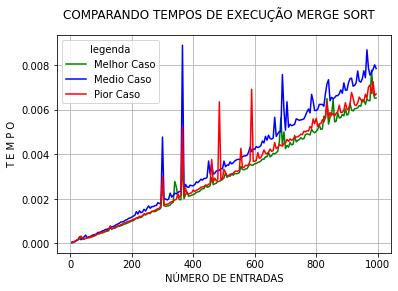

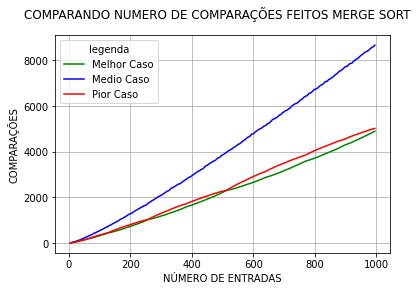


Digite 1 para comparar os melhores e piores casos dos algoritimos de ordenação
Digite 2 para comprar um algoritimo com o outro
Digite 'ex' para sair 

>>>ex


In [29]:
##########MAIN#########
#Rotina principal onde chama os código

#print("EFC1 GCC 253 \n Complexidade e projetos de algoritimo \n Codigo by Rafael Arriel & Fabio Vitor \n \n ")
print(" EFC1 GCC 253 \n Complexidade e projetos de algoritimo \n Codigo by Rafael Arriel \n ")
printMenu()

op = input(">>>")
print("\n")

while op != "ex":
  
  if op =="1":
    rotinaTestOrd()

  elif op =="2":
    print("Falta codigo \n ")
  
  else:
    print("!!!Opção invalida!!! \n")

  
  printMenu()
  op = input(">>>")


